# **Final Project**

IST340 Knowledge Discovery and Data Mining

Group 1: **Yuri Yu**, **Irma Covarrubias**, **Patrick Watkins**

# Task A1

## Load required libraries

In [113]:
pd.set_option('display.max_columns', None) 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

import xgboost as xgb


## Working directory

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

## Data Understanding  

### Collect Initial Data 

In [3]:
# Define a function for reading prolog files
def read_prolog_file(filename):
    with open(filename, 'r') as f:
        content = f.readlines()
    return content

In [4]:
# read the no_payment_due.pl and extract StudentID and NoPaymentDue
content1 = read_prolog_file(filename='datasets\\no_payment_due.pl')

facts = []
for line in content1:
    match = re.match(r'no_payment_due\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, status = match.groups()
        facts.append([studentid, status])
        
df1 = pd.DataFrame(facts, columns=['StudentID', 'NoPaymentDue'])
display(df1.head(), df1.shape)

,StudentID,NoPaymentDue
0,1000,pos
1,999,pos
2,998,pos
3,996,pos
4,994,pos


(1000, 2)

In [5]:
# change the datatype of StudentID to int
df1['StudentID'] = df1['StudentID'].astype(int)

In [6]:
# Enlisted file for Enlisted and Service
content2 = read_prolog_file(filename='datasets\\enlist.pl')

facts = []
for line in content2:
    match = re.match(r'enlist\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, service = match.groups()
        facts.append([studentid, service])

df2 = pd.DataFrame(facts, columns=['StudentID', 'Service'])
display(df2.head(), df2.shape)

,StudentID,Service
0,40,fire_department
1,51,fire_department
2,109,fire_department
3,139,fire_department
4,148,fire_department


(306, 2)

In [7]:
# change the datatype of StudentID to int
df2['StudentID'] = df2['StudentID'].astype(int)

In [8]:
# read Disabled file for Disabled
content3 = read_prolog_file(filename='datasets\\disabled.pl')

facts = []
for line in content3:
    match = re.match(r'disabled\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Disabled'])

df3 = pd.DataFrame(facts, columns=['StudentID', 'Disabled'])
display(df3.head(), df3.shape)

,StudentID,Disabled
0,992,Disabled
1,976,Disabled
2,963,Disabled
3,918,Disabled
4,913,Disabled


(95, 2)

In [9]:
# change the datatype of StudentID to int
df3['StudentID'] = df3['StudentID'].astype(int)

In [10]:
# read Unemployed file for Unemployed
content4 = read_prolog_file(filename='datasets\\unemployed.pl')

facts = []
for line in content4:
    match = re.match(r'unemployed\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Unemployed'])

df4 = pd.DataFrame(facts, columns=['StudentID', 'Unemployed'])
display(df4.head(), df4.shape)

,StudentID,Unemployed
0,1000,Unemployed
1,996,Unemployed
2,993,Unemployed
3,948,Unemployed
4,946,Unemployed


(98, 2)

In [11]:
# change the datatype of StudentID to int
df4['StudentID'] = df4['StudentID'].astype(int)

In [12]:
# read Enrolled file for Enrolled and School
content5 = read_prolog_file(filename = 'datasets\\enrolled.pl')

facts = []
for line in content5:
    match = re.match(r'enrolled\(student(\d+),(.+),(.+)\)\.', line.strip())
    if match:
        studentid, school, units = match.groups()
        facts.append([studentid, school, units])

df5 = pd.DataFrame(facts, columns=['StudentID', 'School', 'Units'])
display(df5.head(), df5.shape)

,StudentID,School,Units
0,10,ucb,2
1,18,ucsd,4
2,20,ucsd,3
3,35,ucsd,4
4,44,ucsd,1


(1194, 3)

In [13]:
# change the data type of Units from object to int
df5['Units'] = df5['Units'].astype(int)

# change the datatype of StudentID to int
df5['StudentID'] = df5['StudentID'].astype(int)

In [14]:
# read Region file for Country, Region, Marital_Status
# from Region,Martial Status.xlsx
df6 = pd.read_excel('datasets\Region, Marital Status.xlsx')
df6.columns = ['StudentID', 'Country', 'Region', 'Marital_Status']
display(df6.head(), df6.shape)

,StudentID,Country,Region,Marital_Status
0,1,USA,2,1
1,2,USA,5,0
2,3,USA,2,1
3,4,USA,1,0
4,5,USA,3,0


(1000, 4)

In [15]:
# change the datatype of StudentID, Region, Marital_Status to int
df6['StudentID'] = df6['StudentID'].astype(int)
df6['Region'] = df6['Region'].astype(int)
df6['Marital_Status'] = df6['Marital_Status'].astype(int)

In [16]:
# read male.pl for Gender
content7 = read_prolog_file(filename = 'datasets\\male.pl')

facts = []
for line in content7:
    match = re.match(r'male\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0],'Male'])

df7 = pd.DataFrame(facts,columns=['StudentID', 'Gender'])
display(df7.head(), df7.shape)
        

,StudentID,Gender
0,997,Male
1,994,Male
2,992,Male
3,987,Male
4,986,Male


(497, 2)

In [17]:
# change the datatype of StudentID to int
df7['StudentID'] = df7['StudentID'].astype(int)

In [18]:
# read longest_absense_from_school.pl for Longest_Absence_From_School
content8 = read_prolog_file(filename = 'datasets\\longest_absense_from_school.pl')

facts = []
for line in content8:
    match = re.match(r'longest_absense_from_school\(student(\d+),(.+)\)\.', line.strip())
    if match:
        studentid, months = match.groups()
        facts.append([studentid, months])

df8 = pd.DataFrame(facts,columns=['StudentID', 'Longest_Absence_From_School'])
display(df8.head(), df8.shape)

,StudentID,Longest_Absence_From_School
0,1000,7
1,999,4
2,998,1
3,997,8
4,996,7


(1000, 2)

In [19]:
# change the datatype of StudentID to int
df8['StudentID'] = df8['StudentID'].astype(int)

In [20]:
# read filed_for_bankrupcy.pl for Filed_For_Bankruptcy
content9 = read_prolog_file(filename = 'datasets\\filed_for_bankrupcy.pl')

facts = []
for line in content9:
    match = re.match(r'filed_for_bankrupcy\(student(\d+)\)\.', line.strip())
    if match:
        studentid = match.groups()
        facts.append([studentid[0], 'Filed_For_Bankruptcy'])

df9 = pd.DataFrame(facts,columns=['StudentID', 'Filed_For_Bankruptcy'])
display(df9.head(), df9.shape)

,StudentID,Filed_For_Bankruptcy
0,999,Filed_For_Bankruptcy
1,998,Filed_For_Bankruptcy
2,958,Filed_For_Bankruptcy
3,956,Filed_For_Bankruptcy
4,953,Filed_For_Bankruptcy


(96, 2)

In [21]:
# change the datatype of StudentID to int
df9['StudentID'] = df9['StudentID'].astype(int)

In [22]:
# read Personality Characteristics file for LongTermPlanningScore, DecisionStyle, PowerOrientedScore, CommunityOrientedScore
df10 = pd.read_excel('datasets\Personality Characteristics Data.xlsx')
df10.columns = ['StudentID', 'LongTermPlanningScore', 'DecisionStyle', 'PowerOrientedScore', 'CommunityOrientedScore']
display(df10.head(), df10.shape)

,StudentID,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore
0,1,0.956004,Emotional,0.767967,0.189491
1,2,0.601589,Analytical,1.000000,0.529815
2,3,0.655254,Emotional,0.589539,0.589539
3,4,0.841278,Emotional,0.805702,0.061538
4,5,0.738851,Emotional,0.415433,0.241257


(1000, 5)

In [23]:
# change the datatype of StudentID to int
df10['StudentID'] = df10['StudentID'].astype(int)

# change the datatype of LongTermPlanningScore, PowerOrientedScore, CommunityOrientedScore to float
df10['LongTermPlanningScore'] = df10['LongTermPlanningScore'].astype(float)
df10['PowerOrientedScore'] = df10['PowerOrientedScore'].astype(float)
df10['CommunityOrientedScore'] = df10['CommunityOrientedScore'].astype(float)

In [24]:
# read Family_Income file for Family_Income
df11 = pd.read_excel('datasets\Family_Income.xlsx')
df11.columns = ['StudentID', 'Family_Income']
display(df11.head(), df11.shape)

,StudentID,Family_Income
0,1,109770.95
1,2,58442.99
2,3,97125.87
3,4,55256.40
4,5,58187.16


(1000, 2)

In [25]:
# change the datatype of StudentID to int
df11['StudentID'] = df11['StudentID'].astype(int)

# change the datatype of Family_Income to float
df11['Family_Income'] = df11['Family_Income'].astype(float)

In [26]:
# Parents_Education file for Parent_Education_Level
df12 = pd.read_excel('datasets\Parents_Education.xlsx')
df12.columns = ['StudentID', 'Parent_Education_Level']
display(df12.head(), df12.shape)

,StudentID,Parent_Education_Level
0,1,Bachelor's
1,2,Doctorate
2,3,HS or Lower
3,4,Master's
4,5,Master's


(1000, 2)

In [27]:
# change the datatype of StudentID to int
df12['StudentID'] = df12['StudentID'].astype(int)

In [28]:
# read CreditRating Data 2012.xlsx for Credit_Score_Raw and Credit_Score_AgeAdj
df13 = pd.read_excel('datasets\CreditRating Data 2012.xlsx')
df13.columns = ['StudentID', 'Credit_Score_Raw', 'Credit_Score_AgeAdj']
display(df13.head(), df13.shape)

,StudentID,Credit_Score_Raw,Credit_Score_AgeAdj
0,1,0.495227,0.767967
1,2,0.987649,0.529815
2,3,0.249315,0.589539
3,4,0.653183,0.805702
4,5,0.273099,0.415433


(1000, 3)

In [29]:
# change the datatype of StudentID to int
df13['StudentID'] = df13['StudentID'].astype(int)

# change the datatype of Credit_Score_Raw, Credit_Score_AgeAdj to float
df13['Credit_Score_Raw'] = df13['Credit_Score_Raw'].astype(float)

In [30]:
# read LoanAmount.xlsx for Loan_Amount
df14 = pd.read_excel('datasets\LoanAmount.xlsx')
df14.columns = ['StudentID', 'Loan_Amount']
display(df14.head(), df14.shape)

,StudentID,Loan_Amount
0,1,19861
1,2,17391
2,3,8118
3,4,18905
4,5,16175


(1000, 2)

In [31]:
# change the datatype of StudentID and Loan_Amount to int
df14['StudentID'] = df14['StudentID'].astype(int)
df14['Loan_Amount'] = df14['Loan_Amount'].astype(int)


In [32]:
# read HS_Academics 2012.xlsx for HS_Math, HS_Science, HS_English
df15 = pd.read_excel('datasets\HS_Academics 2012.xlsx')
df15.columns = ['StudentID', 'HS_Math', 'HS_Science', 'HS_English']
display(df15.head(), df15.shape)

,StudentID,HS_Math,HS_Science,HS_English
0,1,10,10,10.0
1,2,9,9,10.0
2,3,9,6,6.0
3,4,10,9,9.0
4,5,6,8,5.0


(1000, 4)

In [33]:
# change the datatype of StudentID to int
df15['StudentID'] = df15['StudentID'].astype(int)

# change the datatype of HS_Math, HS_Science, HS_English to float
df15['HS_Math'] = df15['HS_Math'].astype(float)
df15['HS_Science'] = df15['HS_Science'].astype(float)
df15['HS_English'] = df15['HS_English'].astype(float)


### Describe Data

In [34]:
# Create a metadata dataframe that contains information about the input dataframe
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

In [35]:
# create a list for all dataframes
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15]

# check metadata for all dataframes, print the name of the dataframe first
for i, df in enumerate(dfs):
    print(f"df{i+1}")
    display(metadata(df))
    print('\n')

df1


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,NoPaymentDue,object,0,0.0,2,0.2,NaN,NaN,NaN




df2


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,283,92.48,4.0,1000.0,283.174744
1,Service,object,0,0.0,7,2.29,NaN,NaN,NaN




df3


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,95,100.00,26.0,992.0,272.247197
1,Disabled,object,0,0.0,1,1.05,NaN,NaN,NaN




df4


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,98,100.00,9.0,1000.0,275.329406
1,Unemployed,object,0,0.0,1,1.02,NaN,NaN,NaN




df5


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,960,80.40,1.0,1000.0,291.379457
1,School,object,0,0.0,6,0.50,NaN,NaN,NaN
2,Units,int32,0,0.0,15,1.26,1.0,15.0,3.750224




df6


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Country,object,0,0.0,2,0.2,NaN,NaN,NaN
2,Region,int32,0,0.0,5,0.5,1.0,5.0,1.398838
3,Marital_Status,int32,0,0.0,3,0.3,0.0,2.0,0.500041




df7


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,497,100.0,1.0,997.0,287.532835
1,Gender,object,0,0.0,1,0.2,NaN,NaN,NaN




df8


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Longest_Absence_From_School,object,0,0.0,10,1.0,NaN,NaN,NaN




df9


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,96,100.00,2.0,999.0,284.657208
1,Filed_For_Bankruptcy,object,0,0.0,1,1.04,NaN,NaN,NaN




df10


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.000000,1000.000000,288.819436
1,LongTermPlanningScore,float64,0,0.0,1000,100.0,0.090978,0.996835,0.171058
2,DecisionStyle,object,0,0.0,2,0.2,NaN,NaN,NaN
3,PowerOrientedScore,float64,0,0.0,960,96.0,0.076820,1.000000,0.202225
4,CommunityOrientedScore,float64,0,0.0,1000,100.0,0.000108,0.932651,0.211015




df11


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.00,1000.00,288.819436
1,Family_Income,float64,0,0.0,1000,100.0,35074.29,114967.96,22725.869857




df12


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Parent_Education_Level,object,0,0.0,7,0.7,NaN,NaN,NaN




df13


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.000000,1000.000000,288.819436
1,Credit_Score_Raw,float64,0,0.0,996,99.6,0.000735,1.000000,0.235416
2,Credit_Score_AgeAdj,float64,0,0.0,1000,100.0,0.045899,0.985665,0.196417




df14


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,Loan_Amount,int32,0,0.0,912,91.2,5847.0,19992.0,3613.024754




df15


,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.0,1000.0,288.819436
1,HS_Math,float64,0,0.0,9,0.9,2.0,10.0,1.683583
2,HS_Science,float64,0,0.0,8,0.8,3.0,10.0,1.590361
3,HS_English,float64,16,1.6,9,0.9,2.0,10.0,1.563881


1. Since the unique values percentages in df2 and df5 are not 100%, which means there may be some one-to-many relationships in the data, we need to aggregate data. 
   
2. For those dataframe with less than 1000 unique values, we need to use left join to merge them with the dataframe with 1000 unique values. And then mark the missing values as 0 or something else.
   
3. In df7, Marital_Status has 3 unique values and a max value of 2. Per the Project Description document, 0 = not married, and 1 = married, so what does 2 stand for?

4. df6 (male.pl) only identifies 497 students as male, so we will have to do a left join on StudentID with this dataset to line up all male students and label all other records as female.

5. df8 (file_for_bankrupcy.pl) only identifies those 96 students who have filed for bankrupcy, so we'll so have to perform a left join on StudentID with this dataset to line up these students and label all other students as NOT filed for bankrupcy.
   
6. No missing values except for HS_English in the academics file. We will have to decide how to handle this missing value based on the further analysis.
   
7. There are some data sets are the subset of the complete dataset that contain only one category of data. We will have to merge them with the complete dataset based on the StudentID. And then describe and explore the data again.

### Data Exploration

In [36]:
# Perform exploratory data analysis on a specified column in a DataFrame, displaying basic statistics and visualizations.
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar plot of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    elif df[column].nunique() >= 10:
         mean = df[column].mean() # mean
         std_dev = df[column].std() # standard deviation
         # Calculate interquartile range (IQR)
         q1 = df[column].quantile(0.25)
         q3 = df[column].quantile(0.75)
         iqr = q3 - q1 # interquartile range
         outlier_range = (q1 - 1.5*iqr, q3 + 1.5*iqr) # outlier range is 1.5 times of IQR
         outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
         outliers = outliers[column].values # outlier values

         print(f"Mean of {column}: {mean:.2f}")
         print(f"Standard deviation of {column}: {std_dev:.2f}")
         print(f"Number of outliers in {column}: {len(outliers)}")
         print("Outliers values:")
         print(outliers)

         plt.figure(figsize=(8, 6))
         sns.boxplot(data=df, x=column)
         plt.title(f"Box plot of {column}") # Box plot
         
         plt.figure(figsize=(8, 6))
         sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
         plt.title(f"Histogram of {column}")
         plt.show()
    else:
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, kde=True) # Histogram
        plt.title(f"Histogram of {column}")
        plt.show()

#### NopPaymentDue

Counts and percentages of unique values in NoPaymentDue:

     Count  Percentage
pos    643        64.3
neg    357        35.7


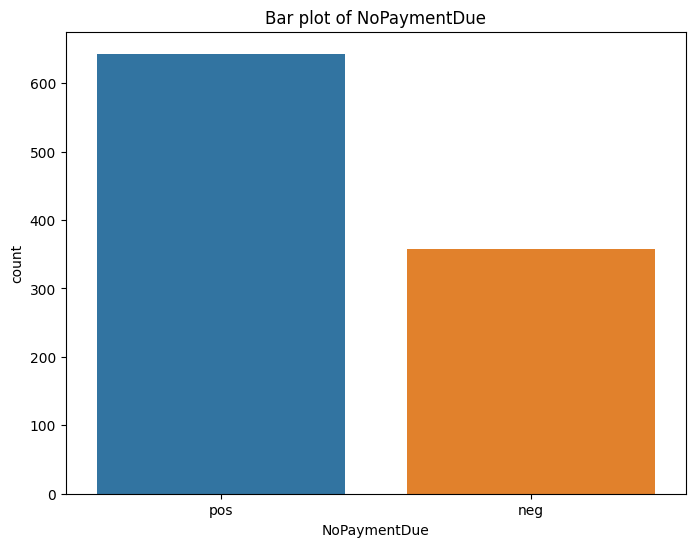

In [37]:
# explore the NoPaymentDue column in df1
data_exploration(df1, 'NoPaymentDue') 
# Positive class is the majority class, which is 20% more than the negative class
# The data is imbalanced, we may use stratified sampling to split the data

#### Service

Counts and percentages of unique values in Service:

                 Count  Percentage
fire_department    114   37.254902
navy                37   12.091503
army                35   11.437908
peace_corps         32   10.457516
marines             31   10.130719
foreign_legion      31   10.130719
air_force           26    8.496732


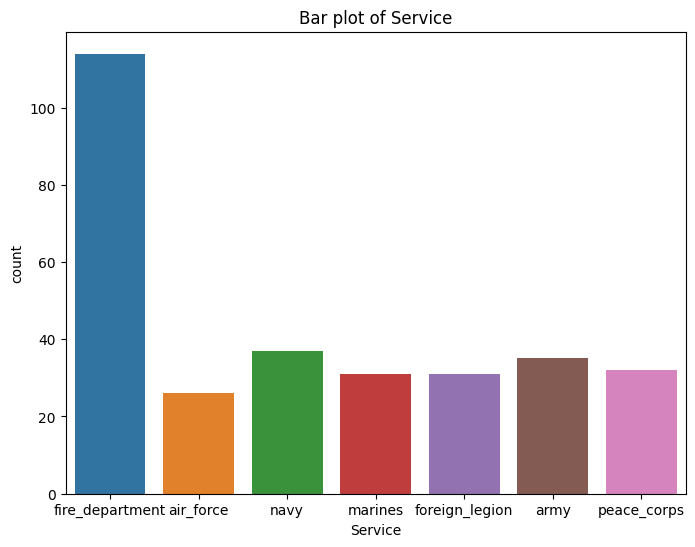

In [38]:
# explore the Service column in df2
data_exploration(df2, 'Service') 
# fire_department is the majority class

#### School

Counts and percentages of unique values in School:

      Count  Percentage
occ     247   20.686767
ucla    236   19.765494
uci     230   19.262982
smc     226   18.927973
ucsd    166   13.902848
ucb      89    7.453936


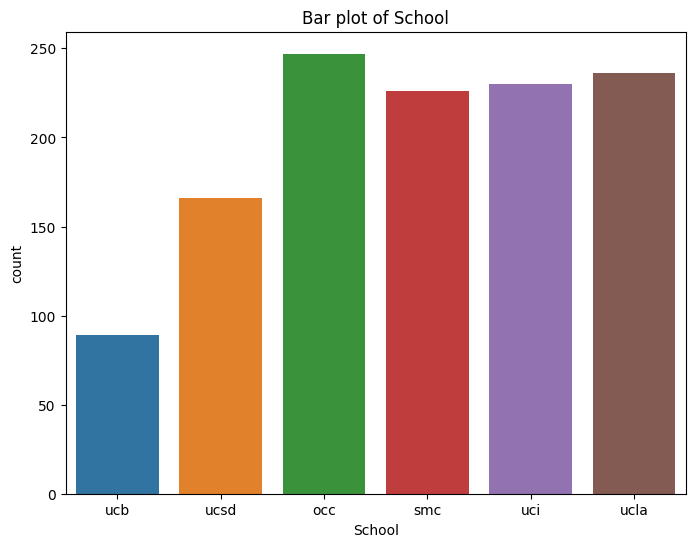

In [39]:
# explore school in df5
data_exploration(df5, 'School')

#### Units

Mean of Units: 6.39
Standard deviation of Units: 3.75
Number of outliers in Units: 0
Outliers values:
[]


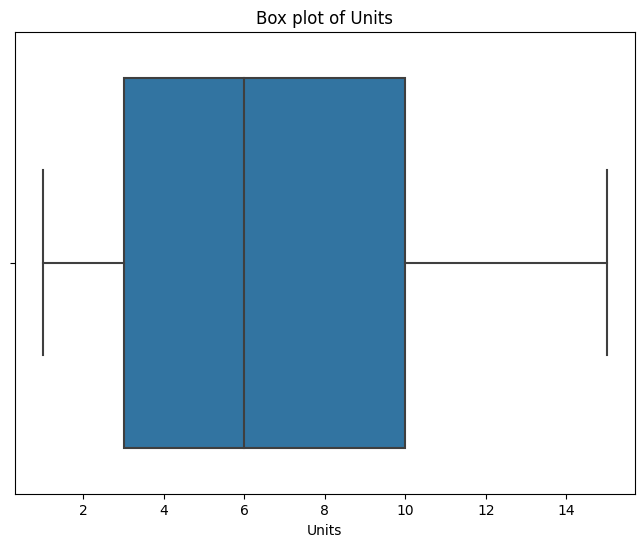

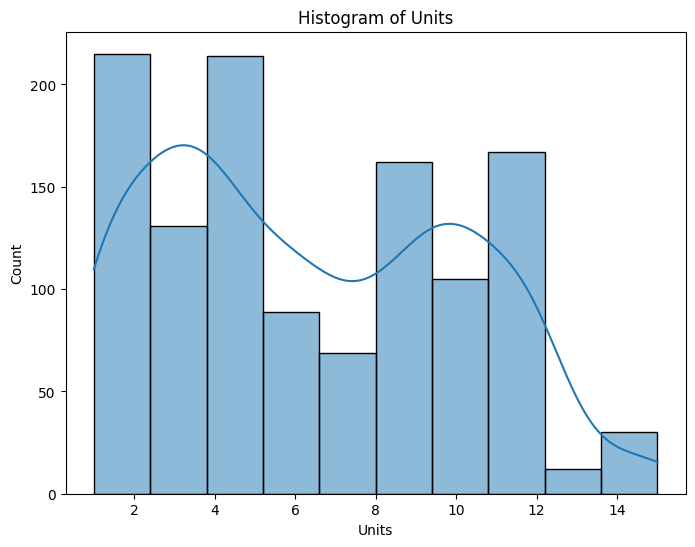

In [40]:
# explore the units in df5
data_exploration(df5, 'Units') # no outliers
# we may sum the units for people who have multiple school records

#### Country

Counts and percentages of unique values in Country:

        Count  Percentage
USA       999        99.9
Belize      1         0.1


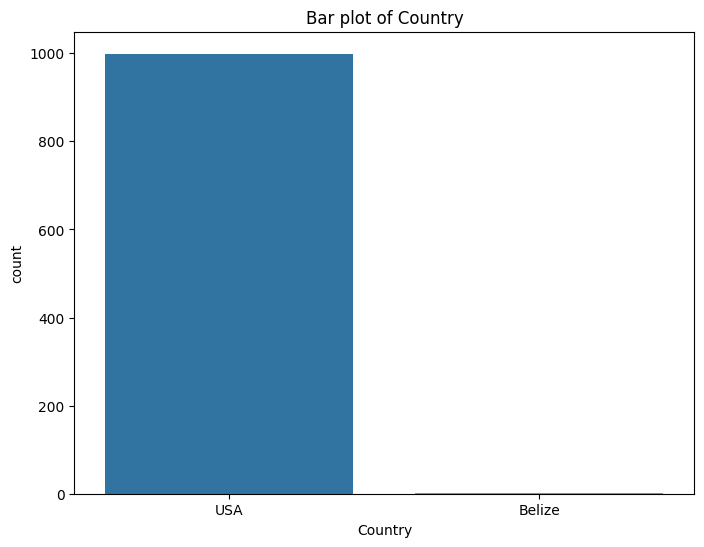

In [41]:
# explore the Country in df7
data_exploration(df6, 'Country') 
# 999 students are from the US, and 1 student is from Belize.
# This column may not useful for our analysis, we may drop this column

#### Region 

Counts and percentages of unique values in Region:

   Count  Percentage
3    207        20.7
5    206        20.6
2    203        20.3
4    202        20.2
1    182        18.2


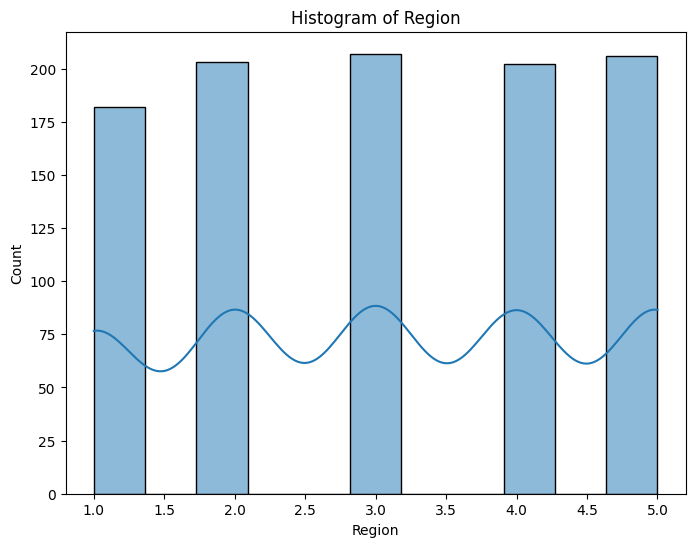

In [42]:
# explore region in df6
data_exploration(df6, 'Region')
# pretty balanced

#### Marital_Status

Counts and percentages of unique values in Marital_Status:

   Count  Percentage
1    545        54.5
0    454        45.4
2      1         0.1


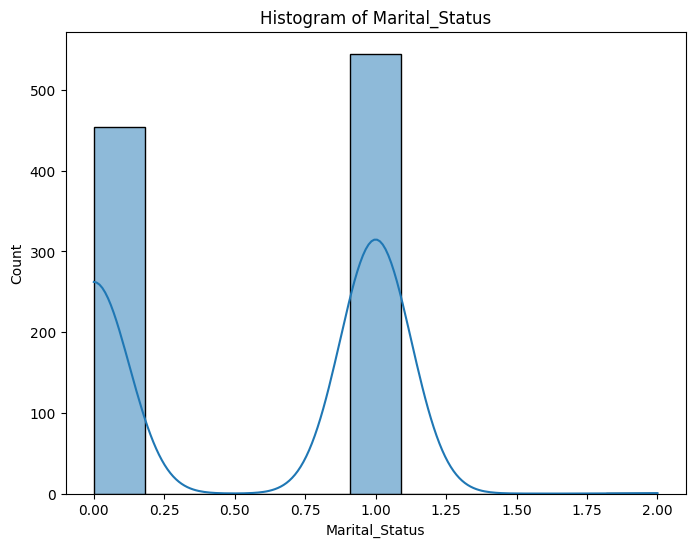

In [43]:
data_exploration(df6, 'Marital_Status')
# there is 0.1% of data is 2, which is not in the description
# it is likely an outlier or an error. Before deciding to drop the row, we should first try to understand the meaning of this value. 
# If the value '2' does not have any clear meaning or it is inconsistent with the problem context, we can consider dropping the row.

#### Gender	

Counts and percentages of unique values in Gender:

      Count  Percentage
Male    497       100.0


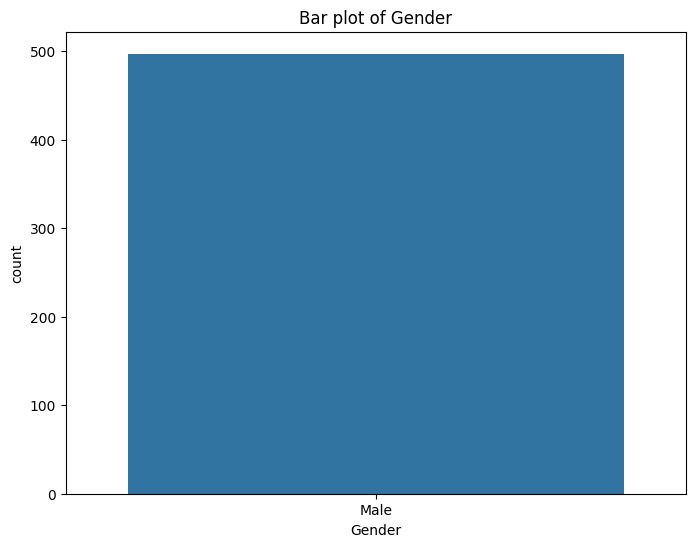

In [44]:
# explore the Gender in df7
data_exploration(df7, 'Gender') 
# since we have totally 1000 students, the data is almost balanced

#### Longest_Absence_From_School

Counts and percentages of unique values in Longest_Absence_From_School:

   Count  Percentage
4    120        12.0
5    110        11.0
3    104        10.4
0    100        10.0
7     99         9.9
2     96         9.6
6     95         9.5
1     93         9.3
8     93         9.3
9     90         9.0


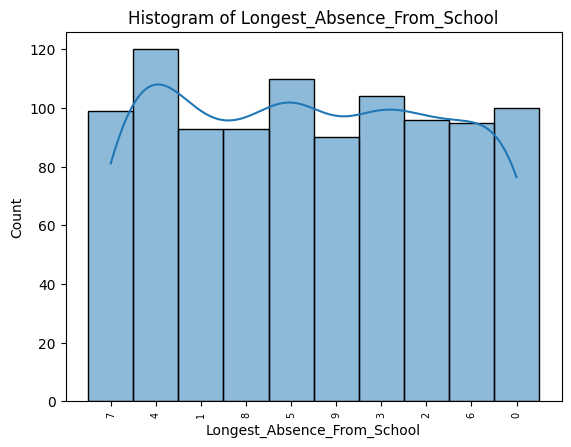

In [45]:
# explore the Longest_Absence_From_School in df8
data_exploration(df8, 'Longest_Absence_From_School')
# balanced data

#### LongTermPlanningScore

Mean of LongTermPlanningScore: 0.70
Standard deviation of LongTermPlanningScore: 0.17
Number of outliers in LongTermPlanningScore: 8
Outliers values:
[0.20067997 0.16686285 0.22992073 0.16196331 0.19883872 0.09097842
 0.1283446  0.17022491]


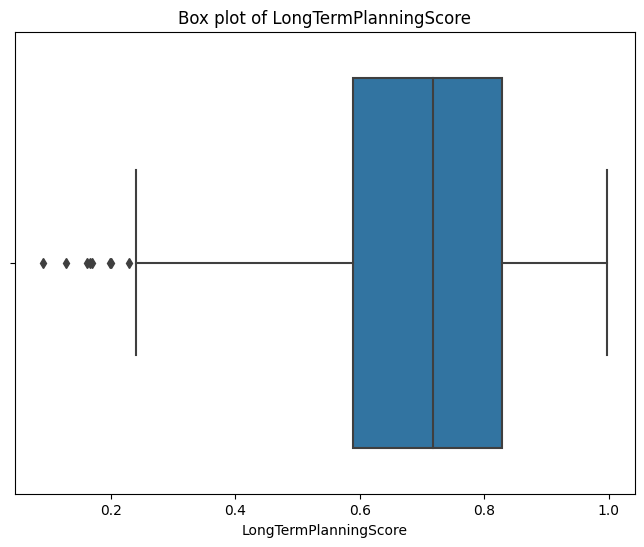

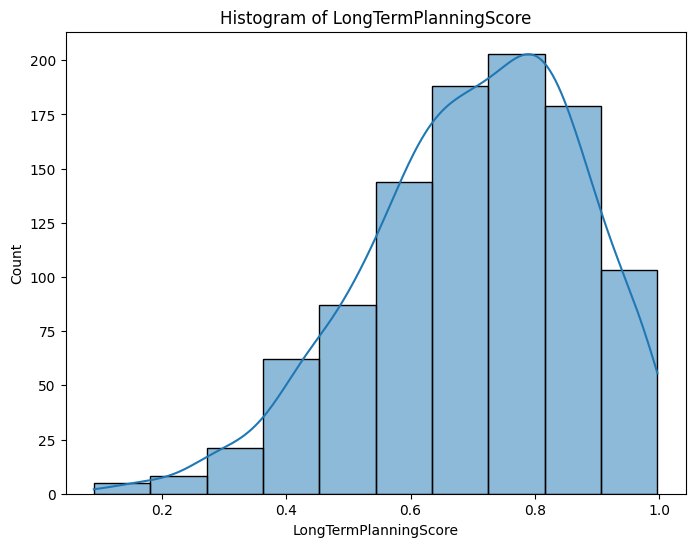

In [46]:
# explore LongTermPlanningScore in df10
data_exploration(df10, 'LongTermPlanningScore')
# there are 8 outliers(0.8% of the data),
# distribution is right skewed
# we may use some models that are less sentitive to outliers

#### DecisionStyle

Counts and percentages of unique values in DecisionStyle:

            Count  Percentage
Emotional     914        91.4
Analytical     86         8.6


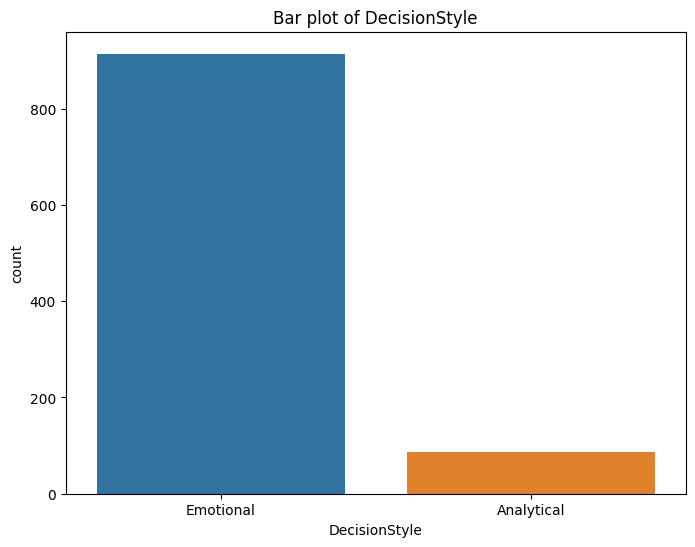

In [47]:
# explore DecisionStyle in df10
data_exploration(df10, 'DecisionStyle')
# unbalanced data, where emotional is the majority class

#### PowerOrientedScore

Mean of PowerOrientedScore: 0.61
Standard deviation of PowerOrientedScore: 0.20
Number of outliers in PowerOrientedScore: 6
Outliers values:
[0.0791475  0.10274739 0.07839175 0.07681959 0.09174184 0.10933996]


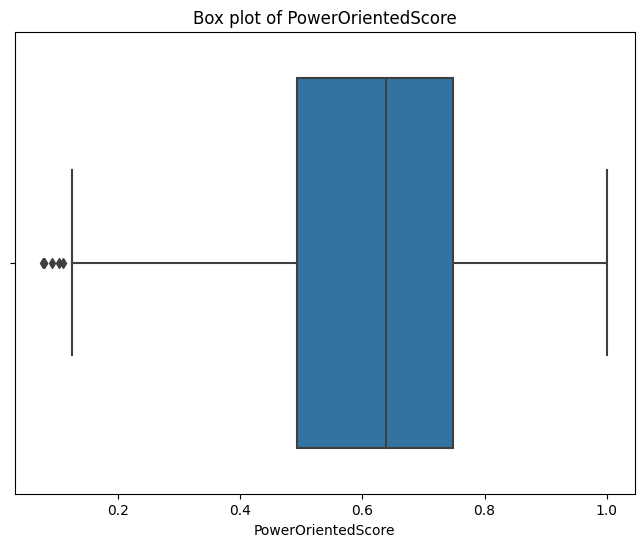

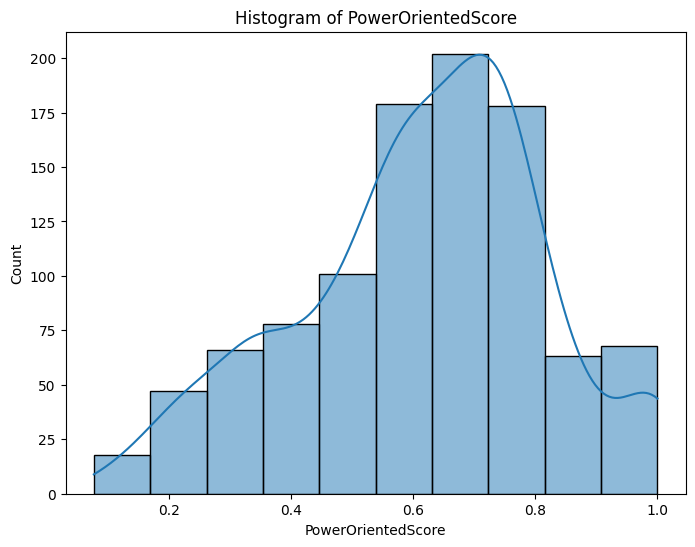

In [48]:
# explore PowerOrientedScore in df10
data_exploration(df10, 'PowerOrientedScore')
# there are 6 outliers(0.6% of the data),
# distribution is right skewed
# we may use some models that are less sentitive to outliers

#### CommunityOrientedScore

Mean of CommunityOrientedScore: 0.38
Standard deviation of CommunityOrientedScore: 0.21
Number of outliers in CommunityOrientedScore: 0
Outliers values:
[]


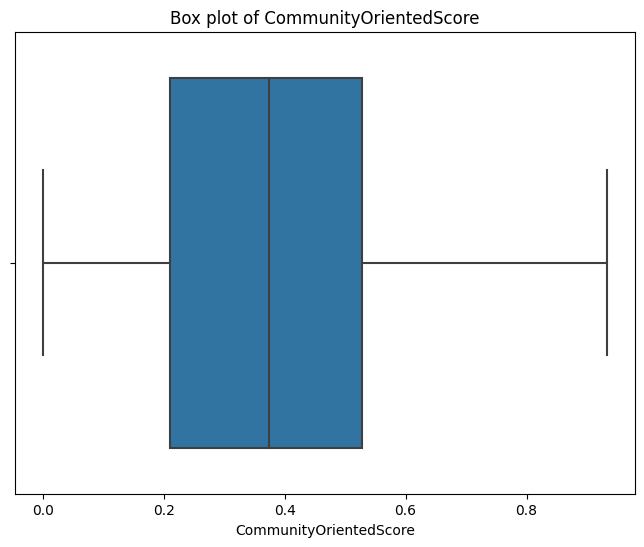

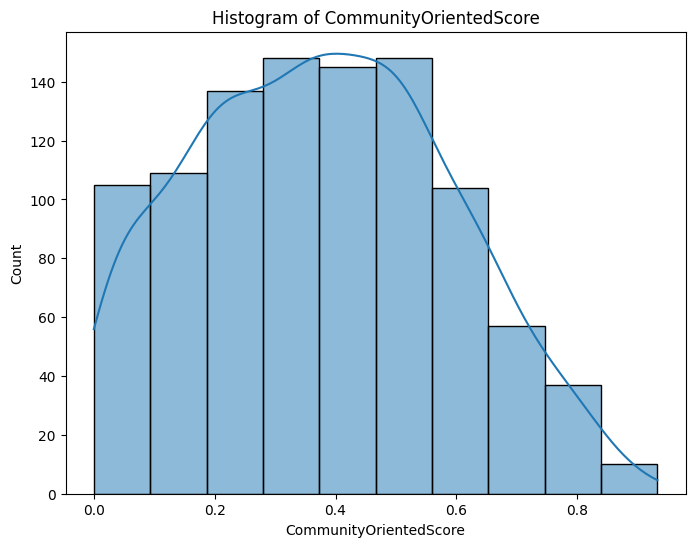

In [49]:
# explore CommunityOrientedScore in df10
data_exploration(df10, 'CommunityOrientedScore')
# no outliers
# almost normally distributed

#### Family_Income

Mean of Family_Income: 75443.84
Standard deviation of Family_Income: 22725.87
Number of outliers in Family_Income: 0
Outliers values:
[]


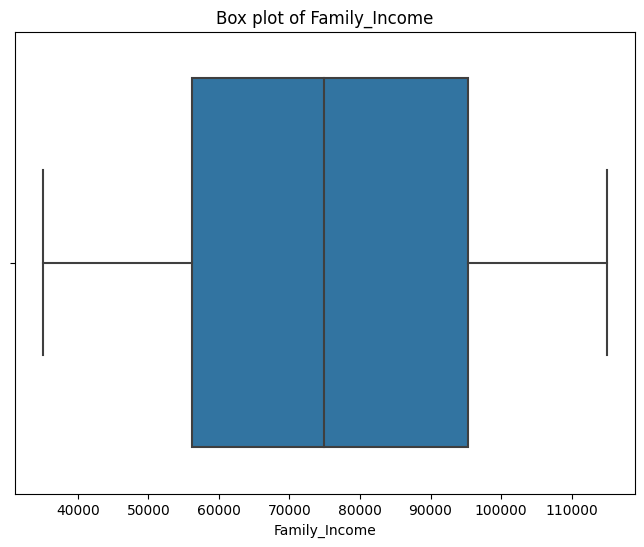

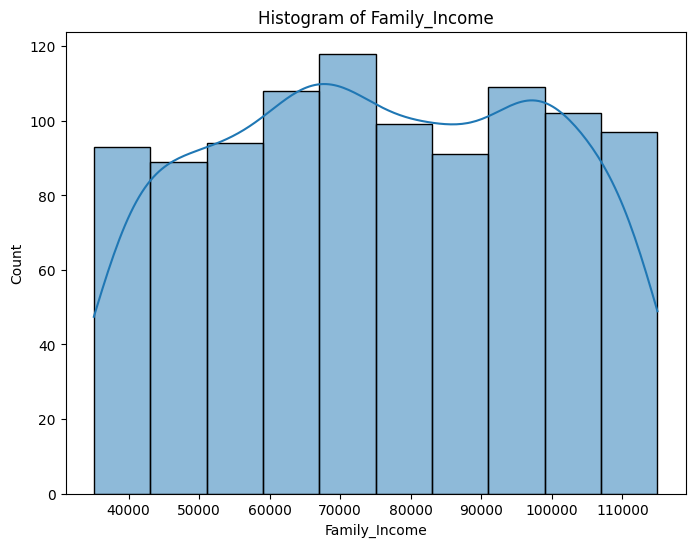

In [50]:
# explore Family_Income in df11
data_exploration(df11, 'Family_Income')
# no outliers
# almost normally distributed
# but we may need to normalize the data

#### Parent_Education_Level

Counts and percentages of unique values in Parent_Education_Level:

                   Count  Percentage
Doctorate            304        30.4
Bachelor's           301        30.1
HS or Lower          284        28.4
Master's             107        10.7
VERY HS or Lower       2         0.2
 VERY HS or Lower      1         0.1
GREAT                  1         0.1


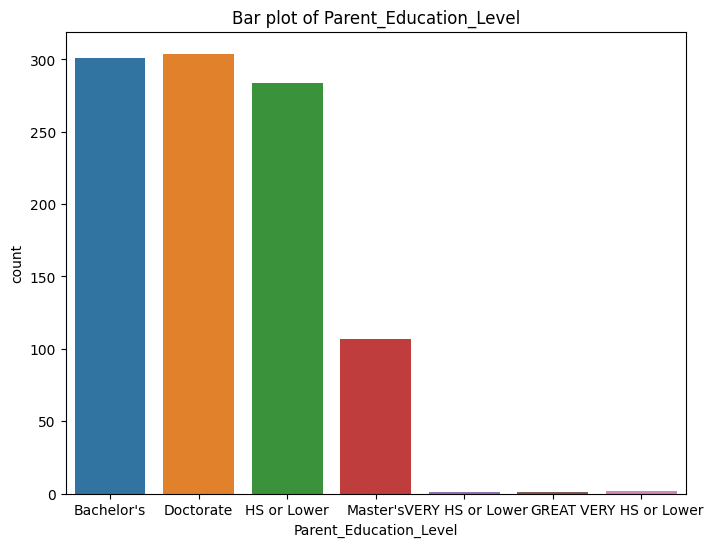

In [51]:
# explore Parent_Education_Level in df12
data_exploration(df12, 'Parent_Education_Level')
# there are two rare categories, which are VERY HS or Lower, and GREAT (VERY HS or Lower needs to be cleaned)
# we may need to group the categories
# we may need to drop the GREATE since it only has 1 record

#### Credit_Score_Raw

Mean of Credit_Score_Raw: 0.46
Standard deviation of Credit_Score_Raw: 0.24
Number of outliers in Credit_Score_Raw: 0
Outliers values:
[]


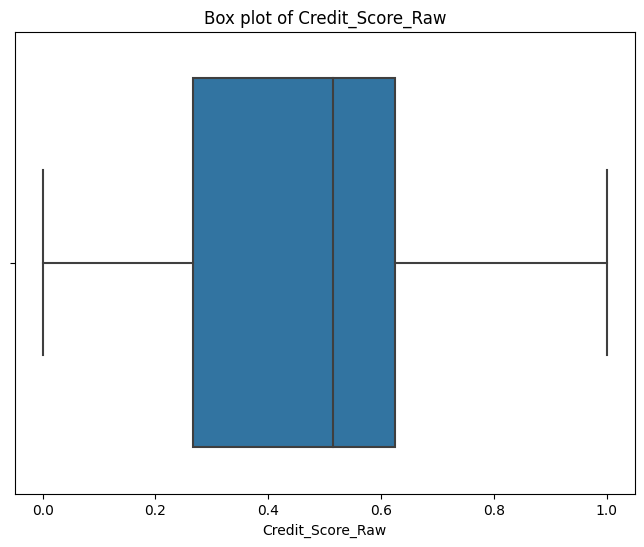

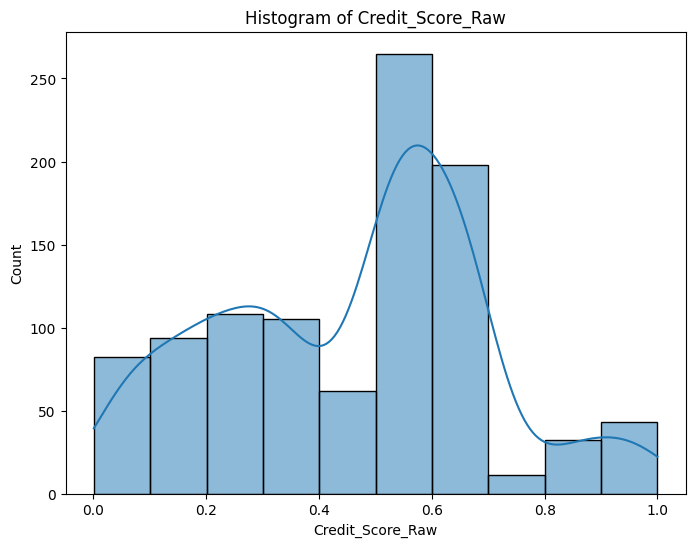

In [52]:
# eplore the Credit_Score_Raw in df13
data_exploration(df13, 'Credit_Score_Raw')

#### Credit_Score_AgeAdj

Mean of Credit_Score_AgeAdj: 0.55
Standard deviation of Credit_Score_AgeAdj: 0.20
Number of outliers in Credit_Score_AgeAdj: 0
Outliers values:
[]


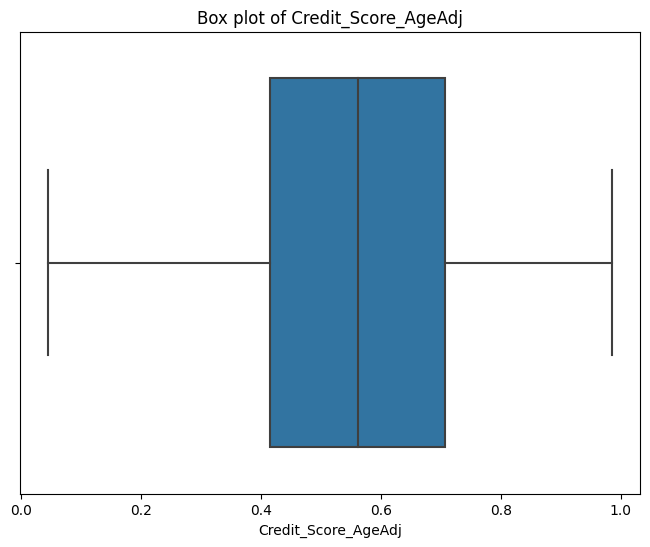

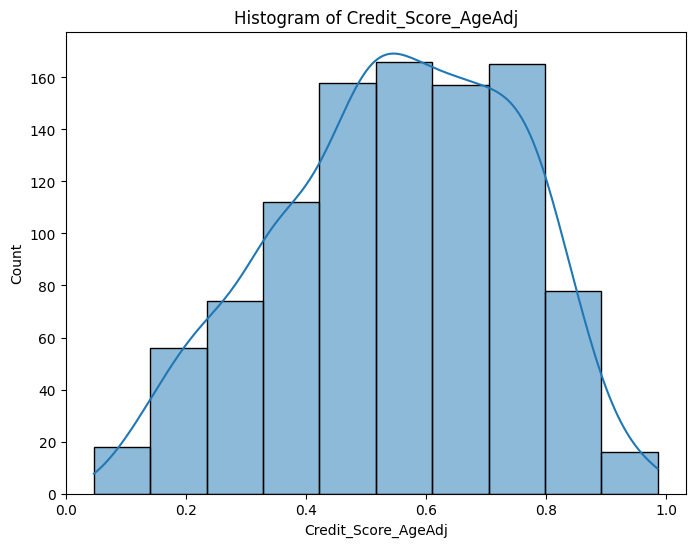

In [53]:
# explore the Credit_Score_AgeAdj in df13
data_exploration(df13, 'Credit_Score_AgeAdj')

#### Loan_Amount

Mean of Loan_Amount: 16859.18
Standard deviation of Loan_Amount: 3613.02
Number of outliers in Loan_Amount: 136
Outliers values:
[8118 6277 6969 7883 8430 8847 7820 8894 7819 7618 8448 8352 8145 8663
 8625 8455 8067 8306 9300 9281 9489 8654 8488 8790 5847 8309 8299 8020
 9042 9287 8851 8680 8434 8622 7984 8196 7776 9149 8429 8233 8661 7776
 8245 9334 7825 6306 7022 8347 8024 7954 8206 6850 8245 8947 8799 8757
 6620 9183 9411 8604 8963 9374 9473 8515 8930 8694 8686 8004 7541 9380
 7623 8047 7142 8014 8499 7879 9097 8140 8765 9393 6836 8918 9174 8479
 7989 8514 8914 8051 9099 9124 8786 7847 8392 7026 9017 7433 7655 7072
 6281 7846 7723 7380 7868 7581 8321 7506 8287 8268 9334 8934 7785 9487
 6053 7784 7870 9463 8474 9220 9003 7557 6323 8404 8279 8755 8137 8628
 7727 7694 9058 7830 7687 8509 8212 9299 8691 6178]


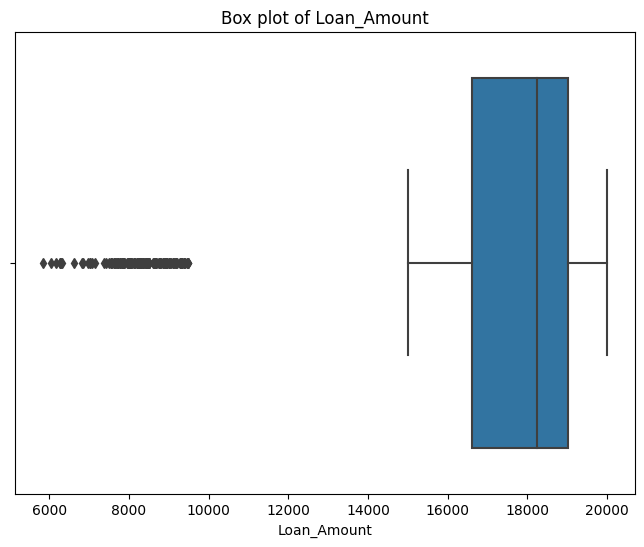

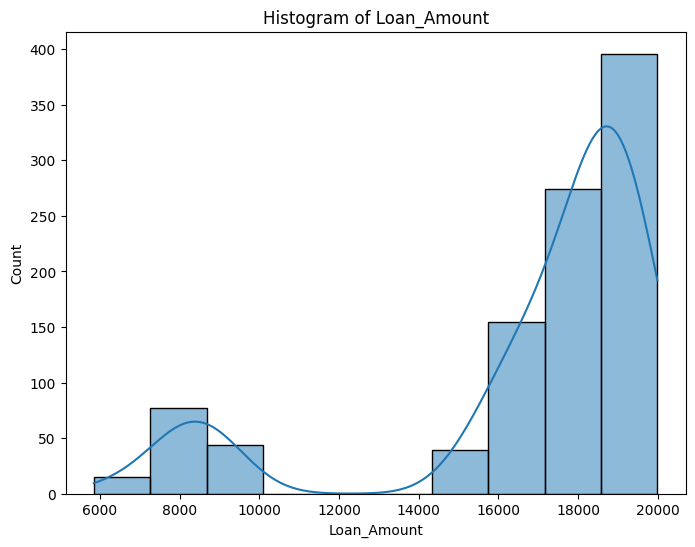

In [54]:
# explore the Loan_Amount in df14
data_exploration(df14, 'Loan_Amount')
# there are a lot of outliers
# it seems that the data has two peaks, which may be caused by two different types of loans or some other reasons
# we may need to group the data into two groups

#### HS_Math, HS_Science, HS_English

Counts and percentages of unique values in HS_Math:

      Count  Percentage
10.0    262        26.2
9.0     240        24.0
7.0     170        17.0
8.0     152        15.2
6.0     107        10.7
5.0      34         3.4
4.0      28         2.8
3.0       4         0.4
2.0       3         0.3


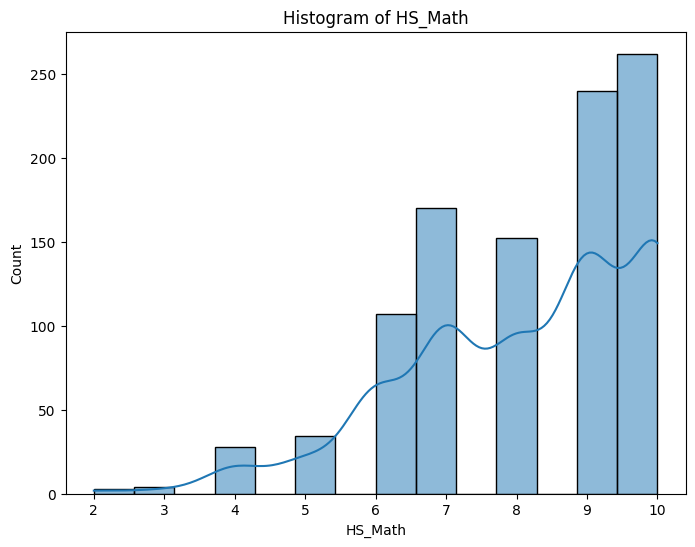

Counts and percentages of unique values in HS_Science:

      Count  Percentage
10.0    233        23.3
9.0     232        23.2
7.0     192        19.2
8.0     181        18.1
6.0     104        10.4
5.0      30         3.0
4.0      23         2.3
3.0       5         0.5


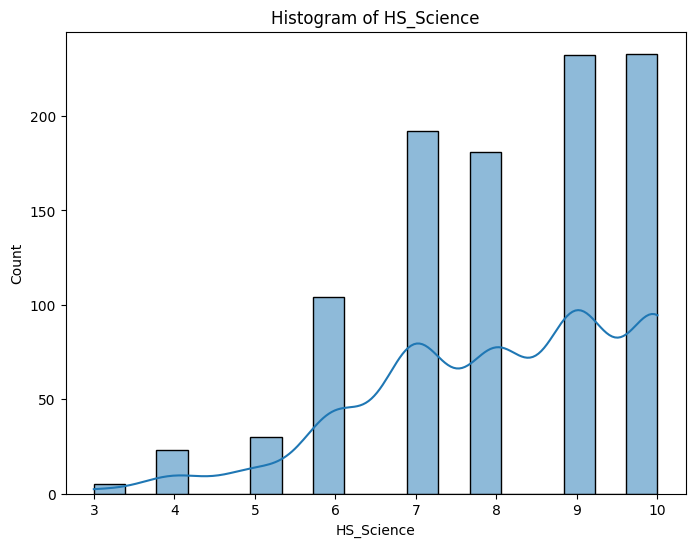

Counts and percentages of unique values in HS_English:

      Count  Percentage
9.0     234   23.780488
10.0    222   22.560976
8.0     196   19.918699
7.0     177   17.987805
6.0     105   10.670732
5.0      24    2.439024
4.0      20    2.032520
3.0       5    0.508130
2.0       1    0.101626


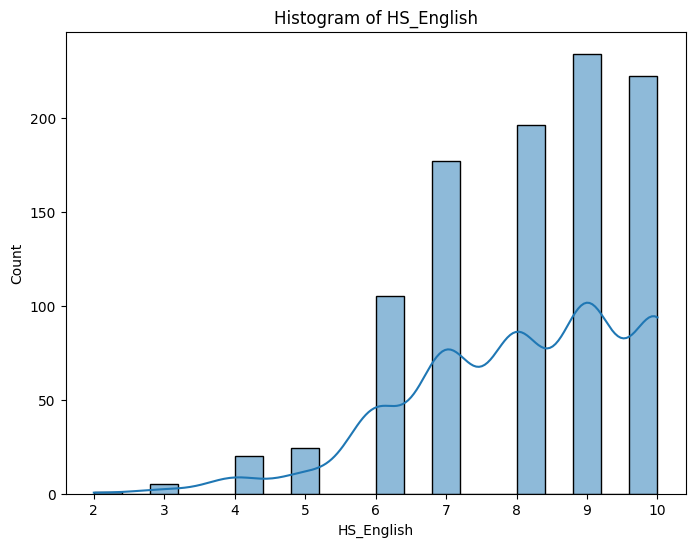

In [55]:
# explore all the columns in df15, except for the StudentID
for column in df15.columns[1:]:
    data_exploration(df15, column)

# HS_English has  is slightly skewed, and there are some outliers.
# we can consider using miss forest or median to impute the missing values

### Merge the raw files

In [56]:
# Add 'Enlisted' and 'Enrolled' columns to df1
df1_agg = df1.copy()
df1_agg['Enlisted'] = df1_agg['StudentID'].apply(lambda x: 1 if x in df2['StudentID'].values else 0)
df1_agg['Enrolled'] = df1_agg['StudentID'].apply(lambda x: 1 if x in df5['StudentID'].values else 0)

df2_agg = df2.groupby('StudentID').agg(TotalServices=('Service', 'count'), Service=('Service', lambda x: ';'.join(x))).reset_index()

# Update the aggregation for df5_agg to include the sum of Units
df5_agg = df5.groupby('StudentID').agg(TotalSchools=('School', 'count'), School=('School', lambda x: ';'.join(x)), Units=('Units', 'sum')).reset_index()

df_agg = df1_agg.merge(df2_agg, on='StudentID', how='left').merge(df5_agg, on='StudentID', how='left')

# Drop the TotalServices and TotalSchools columns since they are for aggregation checking only
df_agg.drop(['TotalServices', 'TotalSchools'], axis=1, inplace=True)

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units
0,1000,pos,1,1,air_force,ucsd;occ,14.0
1,999,pos,1,1,fire_department,smc,4.0
2,998,pos,0,1,NaN,ucb;smc,2.0
3,996,pos,1,1,navy,smc,11.0
4,994,pos,0,1,NaN,uci,9.0


(1000, 7)

In [57]:
# merge df_agg with df3
df_agg = df_agg.merge(df3, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)


,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN
1,999,pos,1,1,fire_department,smc,4.0,NaN
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN
3,996,pos,1,1,navy,smc,11.0,NaN
4,994,pos,0,1,NaN,uci,9.0,NaN


(1000, 8)

In [58]:
# add Unemployed column to df_agg by using df4

df_agg = df_agg.merge(df4, on='StudentID', how='left')


display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN


(1000, 9)

In [59]:
# merge df_agg and df6
df_agg = df_agg.merge(df6, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)


,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1


(1000, 12)

In [60]:
# merge df_agg and df7
df_agg = df_agg.merge(df7, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1,NaN
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1,NaN
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0,NaN
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1,NaN
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1,Male


(1000, 13)

In [61]:
# merge df_agg and df8
df_agg = df_agg.merge(df8, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1,NaN,7
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1,NaN,4
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0,NaN,1
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1,NaN,7
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1,Male,1


(1000, 14)

In [62]:
# merge df_agg and df9
df_agg = df_agg.merge(df9, on='StudentID', how='left')

display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1,NaN,7,NaN
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1,NaN,4,Filed_For_Bankruptcy
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0,NaN,1,Filed_For_Bankruptcy
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1,NaN,7,NaN
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1,Male,1,NaN


(1000, 15)

In [63]:
# merge df_agg and df10, df11, df12, df13, df14, df15 since they have the 100% unique 1000 StudentID
df_agg = df_agg.merge(df10, on='StudentID', how='left')
df_agg = df_agg.merge(df11, on='StudentID', how='left')
df_agg = df_agg.merge(df12, on='StudentID', how='left')
df_agg = df_agg.merge(df13, on='StudentID', how='left')
df_agg = df_agg.merge(df14, on='StudentID', how='left')
df_agg = df_agg.merge(df15, on='StudentID', how='left')

In [64]:
display(df_agg.head(), df_agg.shape)

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Family_Income,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English
0,1000,pos,1,1,air_force,ucsd;occ,14.0,NaN,Unemployed,USA,1,1,NaN,7,NaN,0.843289,Emotional,0.808111,0.569837,54206.48,Bachelor's,0.639912,0.808111,16823,10.0,10.0,9.0
1,999,pos,1,1,fire_department,smc,4.0,NaN,NaN,USA,2,1,NaN,4,Filed_For_Bankruptcy,0.662624,Analytical,1.000000,0.004697,65238.16,HS or Lower,0.989682,0.597839,16943,9.0,9.0,6.0
2,998,pos,0,1,NaN,ucb;smc,2.0,NaN,NaN,USA,5,0,NaN,1,Filed_For_Bankruptcy,0.994214,Analytical,0.855013,0.441015,67495.76,Doctorate,0.777285,0.441015,6178,8.0,9.0,5.0
3,996,pos,1,1,navy,smc,11.0,NaN,Unemployed,USA,3,1,NaN,7,NaN,0.889289,Emotional,0.780557,0.301059,83784.09,HS or Lower,0.612762,0.780557,17924,9.0,10.0,10.0
4,994,pos,0,1,NaN,uci,9.0,NaN,NaN,USA,3,1,Male,1,NaN,0.860842,Emotional,0.829191,0.467755,104457.91,Doctorate,0.585587,0.829191,19106,9.0,9.0,4.0


(1000, 27)

In [65]:
# save the raw dataframe to csv called 'merged_raw_data.csv'
df_agg.to_csv('datasets\merged_raw_data.csv', index=False)

### Describe and Explore merged data

In [66]:
metadata(df_agg)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,StudentID,int32,0,0.0,1000,100.0,1.000000,1000.000000,288.819436
1,NoPaymentDue,object,0,0.0,2,0.2,NaN,NaN,NaN
2,Enlisted,int64,0,0.0,2,0.2,0.000000,1.000000,0.450682
3,Enrolled,int64,0,0.0,2,0.2,0.000000,1.000000,0.196057
4,Service,object,717,71.7,14,1.4,NaN,NaN,NaN
5,School,object,40,4.0,14,1.4,NaN,NaN,NaN
6,Units,float64,40,4.0,20,2.0,1.000000,21.000000,4.032403
7,Disabled,object,905,90.5,1,0.1,NaN,NaN,NaN
8,Unemployed,object,902,90.2,1,0.1,NaN,NaN,NaN
9,Country,object,0,0.0,2,0.2,NaN,NaN,NaN


1. Other than the HS_English, we will need to format the categorical data. Missing values will be marked as other category.
   
2. The missing value for units will be marked as 0 since those students have not attended any school yet nor taken any units.

2. For school and service, We will need to use one-hot encoding to convert the categorical data into numerical data with new columns. 


#### Enroll

Counts and percentages of unique values in Enrolled:

   Count  Percentage
1    960        96.0
0     40         4.0


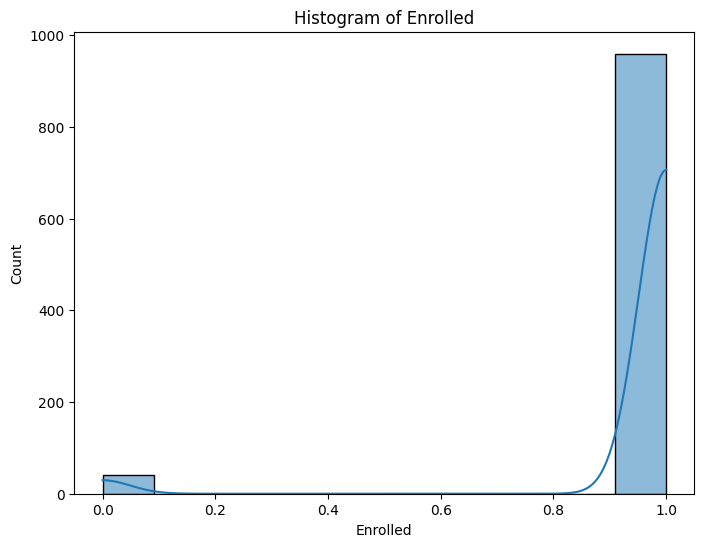

In [67]:
# explore enroll
data_exploration(df_agg, 'Enrolled')
# unbalanced data, where 1 (enrolled in school) is the majority class

#### School(aggregated)

Counts and percentages of unique values in School:

           Count  Percentage
occ          183   19.062500
ucla         179   18.645833
uci          173   18.020833
smc          170   17.708333
ucsd;occ      41    4.270833
ucsd;uci      41    4.270833
ucsd;ucla     39    4.062500
ucsd;smc      36    3.750000
ucb;occ       23    2.395833
ucb;smc       20    2.083333
ucb;ucla      18    1.875000
ucb;uci       16    1.666667
ucb           12    1.250000
ucsd           9    0.937500


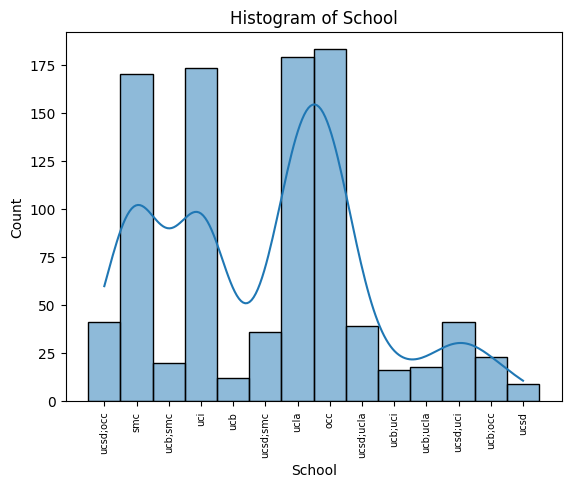

In [68]:
# explore school
data_exploration(df_agg, 'School')
# unbalanced data
# we may need to group the minor categories
# for example, ucsd;occ, ucsd;uci, ucsd;ucla, ucsd;smc could be grouped with ucsd

# or we may use one hot encoding to encode the data

#### Units(aggregated)

Mean of Units: 7.95
Standard deviation of Units: 4.03
Number of outliers in Units: 2
Outliers values:
[21. 21.]


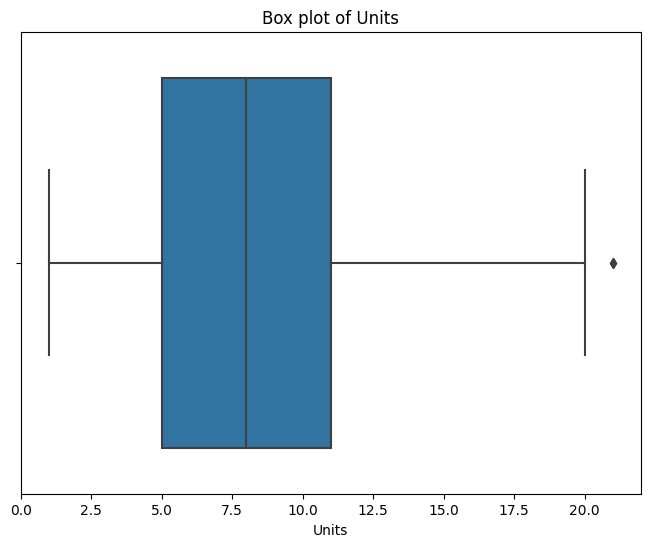

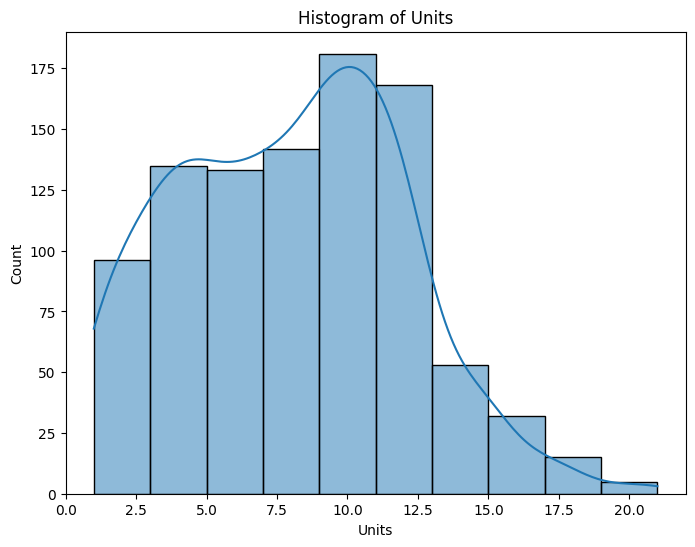

In [69]:
# explore Units
data_exploration(df_agg, 'Units') # only two outliers

#### Enlisted

Counts and percentages of unique values in Enlisted:

   Count  Percentage
0    717        71.7
1    283        28.3


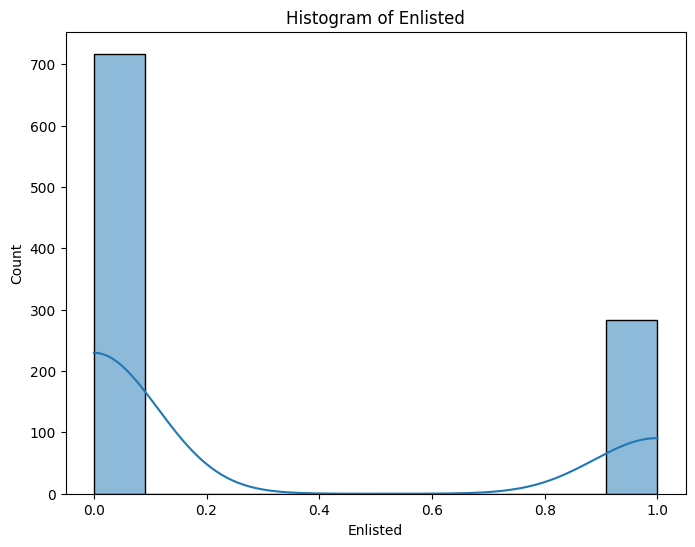

In [70]:
# explore Enlisted
data_exploration(df_agg, 'Enlisted') # unbalanced data, where 0 (not enlisted) is the majority class

#### Service(aggregated)

Counts and percentages of unique values in Service:

                                 Count  Percentage
fire_department                     88   31.095406
navy                                34   12.014134
peace_corps                         30   10.600707
marines                             29   10.247350
army                                29   10.247350
foreign_legion                      27    9.540636
air_force                           23    8.127208
fire_department;army                 6    2.120141
fire_department;foreign_legion       4    1.413428
fire_department;navy                 3    1.060071
fire_department;fire_department      3    1.060071
fire_department;air_force            3    1.060071
fire_department;marines              2    0.706714
fire_department;peace_corps          2    0.706714


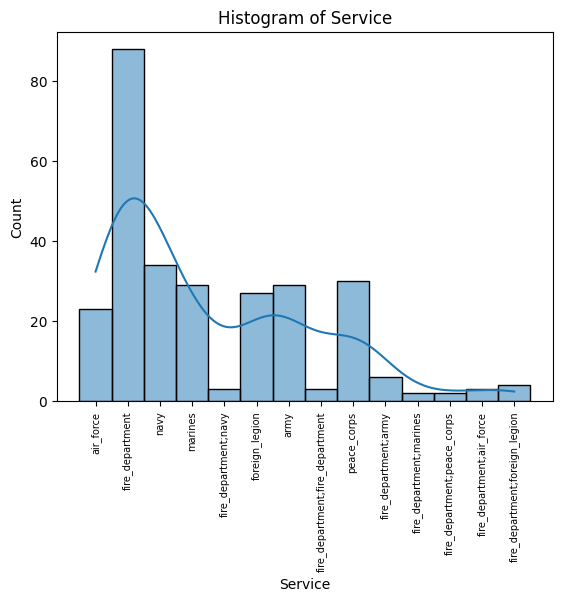

In [71]:
# explore Service
data_exploration(df_agg, 'Service')
# we can group the fire department categories together
# either group those minor categories into fire department
# or group those minor categories into corresponding major categories based on the second service

# or we may use one hot encoding to encode the data

In [72]:
# check the duplicated records
df_agg[df_agg.duplicated()]

,StudentID,NoPaymentDue,Enlisted,Enrolled,Service,School,Units,Disabled,Unemployed,Country,Region,Marital_Status,Gender,Longest_Absence_From_School,Filed_For_Bankruptcy,LongTermPlanningScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Family_Income,Parent_Education_Level,Credit_Score_Raw,Credit_Score_AgeAdj,Loan_Amount,HS_Math,HS_Science,HS_English


Conclusion of the data understanding phase:
1. Impute the missing values based on the metadata
2. Group the some categorical data and even some numeric data into fewer categories
3. Drop the potential useless category with only one record - Marital_Status,Parent_Education_Level
4. Drop the potentially usesless column - Country, StudentID(Non-predictor)
5. Encode the some categorical data into numerical data
6. Use stratified sampling to split the data into training and testing data
7. Encode the target variable based on the target event
8. Orinalize the data based on the Table3 in the Project Description document
9. No duplicate records
10. Standardize numerical feature like family income

## Data Preparation

In [73]:
# Create a new dataframe called df_agg_cl, which is a copy of df_agg
df_agg_cl = df_agg.copy()

### Select Data

#### Drop the useless column

In [74]:
# Since the USA is the only country in the column if we drop the one record country which is Belize, we can drop the entire Country column
df_agg_cl.drop(['Country'], axis=1, inplace=True)

In [75]:
# drop the StudentID column since it is not useful for modeling
df_agg_cl.drop(['StudentID'], axis=1, inplace=True)

#### Drop the deviant record

In [76]:
# Since category 2 only has 1 record in Marital_Status, we can drop it
# drop the record that has Marital_Status = 2 in df_agg_cl
df_agg_cl = df_agg_cl[df_agg_cl['Marital_Status'] != 2]


In [77]:
# Similarly, we can drop the record that has Parent_Education_Level= GREATE
df_agg_cl = df_agg_cl[df_agg_cl['Parent_Education_Level'] != 'GREAT']

### Clean Data

#### Group Data 

In [78]:
# gourp HS or lower and VERY HS or Lower together
df_agg_cl['Parent_Education_Level'] = df_agg['Parent_Education_Level'].apply(lambda x: 'HS or Lower' if x == ' VERY HS or Lower' else x)
df_agg_cl['Parent_Education_Level'] = df_agg_cl['Parent_Education_Level'].apply(lambda x: 'HS or Lower' if x == 'VERY HS or Lower' else x)
df_agg_cl['Parent_Education_Level'].value_counts()
# We will  encode to ordinal

Doctorate      303
Bachelor's     301
HS or Lower    287
Master's       107
Name: Parent_Education_Level, dtype: int64

In [79]:
# Since the interval column 'Loan_Amount' has a lot of outliers that rougly form a group, we will group the data into two categorical groups
# If the Loan_Amount is less than 12000, we will group it into 0, otherwise, we will group it into 1
df_agg_cl['Loan_Amount'] = df_agg['Loan_Amount'].apply(lambda x: 0 if x < 12000 else 1)

df_agg_cl['Loan_Amount'].value_counts() # At this point, 1 is the high loan group, and 0 is the low loan group

1    862
0    136
Name: Loan_Amount, dtype: int64

#### Missing value imputation with a constant value

Replace the missing values with a constant value that does not appear in the dataset. This is usually done when the missing value itself has some specific meaning, e.g., when missing values indicate a 0 status.

In [80]:
# replace the missing values in the 'Units' column with 0
df_agg_cl['Units'].fillna(0, inplace=True)

In [81]:
# Disabled: 1, Missing Values: 0
df_agg_cl['Disabled'] = df_agg['Disabled'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [82]:
# Unemployed: 1; Missing Values: 0
df_agg_cl['Unemployed'] = df_agg['Unemployed'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [83]:
# Gender: Male- 1, Female- 0
df_agg_cl['Gender'] = df_agg['Gender'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [84]:
# Bankruptcy: Yes- 1, No- 0
df_agg_cl['Filed_For_Bankruptcy'] = df_agg['Filed_For_Bankruptcy'].apply(lambda x: 1 if pd.notnull(x) else 0)

#### Missing value imputation with Median

In [85]:
# since there is only 1.6% missing values in the HS_English column, and it is right skewed, we will replace the missing values with the median
df_agg_cl['HS_English'].fillna(df_agg_cl['HS_English'].median(), inplace=True)
# median is 8.0 so that we don't have to worry about the rounding float into integer

### Format Data 

#### Ordinalize the data

In [86]:
df_agg_cl['Parent_Education_Level'].value_counts()

Doctorate      303
Bachelor's     301
HS or Lower    287
Master's       107
Name: Parent_Education_Level, dtype: int64

In [87]:
# Ordinalize Encoding for Parent_Education_Level: HS or Lower -> Bachelor's -> Master's -> Doctorate
df_agg_cl['Parent_Education_Level'] = df_agg_cl['Parent_Education_Level'].map({'HS or Lower': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'Doctorate': 3})
df_agg_cl['Parent_Education_Level'].value_counts()

3    303
1    301
0    287
2    107
Name: Parent_Education_Level, dtype: int64

In [88]:
# Convert the Longest_Absence_From_School column from object to numeric
df_agg_cl['Longest_Absence_From_School'] = df_agg_cl['Longest_Absence_From_School'].astype('int64')

df_agg_cl['Longest_Absence_From_School'].value_counts()

4    119
5    109
3    104
0    100
7     99
2     96
6     95
1     93
8     93
9     90
Name: Longest_Absence_From_School, dtype: int64

#### Binary encoding

In [89]:
df_agg_cl['DecisionStyle'].value_counts()

Emotional     912
Analytical     86
Name: DecisionStyle, dtype: int64

In [90]:
# use binary encoding for the DecisionStyle column in case we need to use some models that require numeric data
df_agg_cl['DecisionStyle'] = df_agg_cl['DecisionStyle'].map({'Analytical': 0, 'Emotional': 1})

In [91]:
df_agg_cl['DecisionStyle'].value_counts()

1    912
0     86
Name: DecisionStyle, dtype: int64

#### Nomralize the data

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_agg_cl['Family_Income_normalized'] = scaler.fit_transform(df_agg_cl[['Family_Income']])

# drop the original Family_Income column
df_agg_cl.drop(['Family_Income'], axis=1, inplace=True)

In [93]:
display(df_agg_cl.loc[:5,'Family_Income_normalized'], df_agg_cl.shape)

0    0.239471
1    0.377550
2    0.405808
3    0.609683
4    0.868450
5    0.805415
Name: Family_Income_normalized, dtype: float64

(998, 25)

### Construct Data

In [94]:
# Perform one-hot encoding on the 'School' column, considering the aggregated values
# Set the separator to ';'
school_dummies = df_agg_cl['School'].str.get_dummies(sep=';')

# Add a 'School' prefix to the one-hot encoded columns
school_dummies.columns = ['School_' + col for col in school_dummies.columns]

# Concatenate the original DataFrame with the one-hot encoded columns
df_agg_cl_encoded = pd.concat([df_agg_cl, school_dummies], axis=1)

# Drop the original 'School' column
df_agg_cl_encoded.drop('School', axis=1, inplace=True)

display(df_agg_cl_encoded.iloc[:5,25:], df_agg_cl_encoded.shape)

,School_smc,School_ucb,School_uci,School_ucla,School_ucsd
0,0,0,0,0,1
1,1,0,0,0,0
2,1,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


(998, 30)

In [95]:
# Similarly, perform one-hot encoding on the 'Service' column, considering the aggregated values
# Set the separator to ';'
service_dummies = df_agg_cl_encoded['Service'].str.get_dummies(sep=';')

# Add a 'Service' prefix to the one-hot encoded columns
service_dummies.columns = ['Service_' + col for col in service_dummies.columns]

# Concatenate the original DataFrame with the one-hot encoded columns
df_agg_cl_encoded = pd.concat([df_agg_cl_encoded, service_dummies], axis=1)

# Drop the original 'Service' column
df_agg_cl_encoded.drop('Service', axis=1, inplace=True)

display(df_agg_cl_encoded.iloc[:5,29:], df_agg_cl_encoded.shape)

,Service_air_force,Service_army,Service_fire_department,Service_foreign_legion,Service_marines,Service_navy,Service_peace_corps
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0


(998, 36)

In [96]:
df1 = df_agg_cl_encoded.copy() # save a copy of the cleaned data for Task A

# save as csv file called 'TaskA.csv'
df1.to_csv('datasets/TaskA.csv', index=False)

## Modeling

### Encode Target Variable for A1

In [97]:
# Since the targt event is NoPaymentDue  = ‘pos’
# We will encode the target variable to 1 if NoPaymentDue = ‘pos’ and 0 otherwise for df_a1
df_a1 = df1.copy()
df_a1['NoPaymentDue'] = df1['NoPaymentDue'].map({'pos': 1, 'neg': 0})


Counts and percentages of unique values in NoPaymentDue:

   Count  Percentage
1    641   64.228457
0    357   35.771543


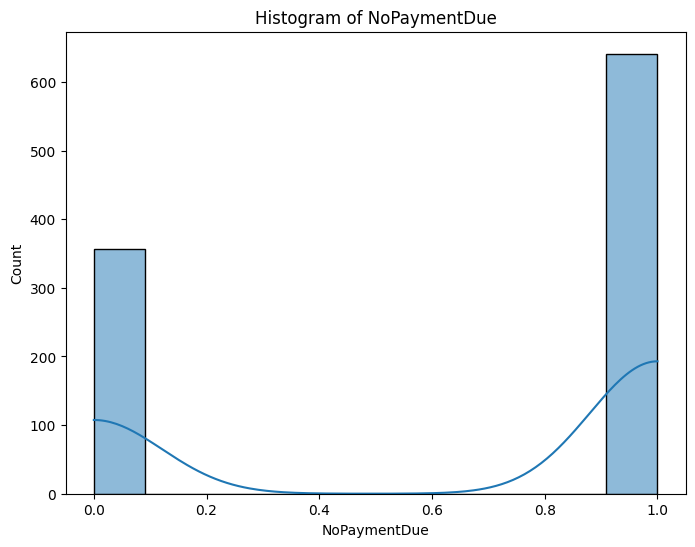

In [98]:
data_exploration(df_a1, 'NoPaymentDue') # notice that the target variable is imbalanced
# the model accuracy should be higher than 0.64 to be considered better than the baseline model

### Generate Test Design

#### Data Splitting

In [99]:
# split the data into training and testing sets - 70% training, 30% testing - Using stratified sampling
X = df_a1.drop('NoPaymentDue', axis=1)
y = df_a1['NoPaymentDue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666, stratify=y)

print("The length of training set:", len(X_train))
print("The length of testing  set:", len(y_test))

The length of training set: 698
The length of testing  set: 300


### SVM

In [100]:
# Train an SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=666)
svm_model.fit(X_train, y_train)

# Make predictions using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the performance of the SVM model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm))


Confusion Matrix:
[[106   1]
 [  2 191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.99      0.99      0.99       193

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Accuracy Score:
0.99


In [101]:
# Perform 5-fold cross-validation on the scaled data
cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Check for overfitting by comparing performance on the training and test sets
y_pred_train_svm = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train_svm)
test_accuracy = accuracy_score(y_test, y_pred_svm)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    difference = train_accuracy - test_accuracy
    print("The training accuracy is higher than test accuracy by", difference)
    if difference > 0.1:  # Arbitrary threshold, adjust as needed
        print("There might be overfitting")
    else:
        print("The difference is small, overfitting might not be an issue")
else:
    print("Overfitting is not an issue")


Cross-Validation Scores: [0.985      0.995      0.98       0.98492462 0.96984925]
Average Cross-Validation Score: 0.9829547738693467
Training Set Accuracy: 0.9856733524355301
Test Set Accuracy: 0.99
Overfitting is not an issue


Since we gain extremlly  high scores with SVM, we check the over fitting problem by using cross validation.
As it shows, there is no over fitting problem, so we will keep this model and see if the performance is consistent among different models.

### Decision Tree

In [102]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10, int(len(X_train)*0.03), int(len(X_train)*0.06)],
    'criterion': ['gini', 'entropy']
}

# Create the decision tree classifier model
dt_model = DecisionTreeClassifier(random_state=666)

# Create the grid search object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model from grid search
best_dt_model = grid_search.best_estimator_



Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [103]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier(random_state=666, **grid_search.best_params_)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Display the confusion matrix, classification report, and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_dt))


Confusion Matrix:
[[101   6]
 [  2 191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       107
           1       0.97      0.99      0.98       193

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300


Accuracy Score:
0.9733333333333334


The result looks good. We will check the structure of the tree if needed later.

### KNN

In [104]:
# Define the hyperparameter grid
param_grid = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("Best Hyperparameters:")
print(knn_grid.best_params_)

Best Hyperparameters:
{'n_neighbors': 16}


In [105]:
# Get the best model from grid search
knn_model = KNeighborsClassifier(**knn_grid.best_params_)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Display the confusion matrix, classification report, and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
[[ 92  15]
 [ 44 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       107
           1       0.91      0.77      0.83       193

    accuracy                           0.80       300
   macro avg       0.79      0.82      0.80       300
weighted avg       0.83      0.80      0.81       300


Accuracy Score:
0.8033333333333333


KNN's performance can degrade in high-dimensional feature spaces, as the distance between points becomes less meaningful in higher dimensions.
Therefore, we think this is reason why KNN has a lower performance than SVM and Decision Tree.

### xgboost

In [108]:
# Train the XGB model
xgb_model = xgb.XGBClassifier(random_state=666) # Initialize xgboost classifier 

# Fit the model to the training data
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test) # Get predictions

# Evaluate the performance of the XGB Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_xgb))

Confusion Matrix:
[[102   5]
 [  1 192]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.97      0.99      0.98       193

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300


Accuracy Score:
0.98


### Multinomial Naive Bayes

In [109]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mnb = mnb_model.predict(X_test)

# Display the confusion matrix, classification report, and accuracy score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_mnb))

Confusion Matrix:
[[ 88  19]
 [ 10 183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       107
           1       0.91      0.95      0.93       193

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.90      0.90       300


Accuracy Score:
0.9033333333333333


### Multilayer Perceptron

In [112]:
# Function to create a Keras model with specified hyperparameters
def create_model(optimizer='adam', neurons=32, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],))) # dim is 35
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model with the KerasClassifier
model_mlp = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model_mlp , param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3)

# Fit the grid search to the data
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_result.best_params_)


C:\Users\yuyum\AppData\Local\Temp\ipykernel_24632\916362701.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best Hyperparameters:
{'batch_size': 16, 'dropout_rate': 0.2, 'epochs': 100, 'neurons': 128, 'optimizer': 'adam'}
10/10 [==============================] - 0s 798us/step
Confusion Matrix:
[[ 95  12]
 [  0 193]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       107
           1       0.94      1.00      0.97       193

    accuracy                           0.96       300
   macro avg       0.97      0.94      0.96       300
weighted avg       0.96      0.96      0.96       300


Accuracy Score:
0.96


It took a long time to run this model. And the performance is just fine. So it could be not a good choice.

In [131]:
from tensorflow import keras
model_mlp  = Sequential()
model_mlp .add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_mlp .add(Dropout(0.2))
model_mlp .add(Dense(128, activation='relu'))
model_mlp .add(Dropout(0.2))
model_mlp .add(Dense(1, activation='sigmoid'))
    
model_mlp .compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model_mlp .fit(X_train, y_train, validation_split=0.33, batch_size=16, epochs=100, verbose=0)

y_pred_best_t = model_mlp .predict(X_test, verbose=0)

# Print the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_t.round()))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_t.round()))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_best_t.round()))

Confusion Matrix:
[[105   2]
 [  3 190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.99      0.98      0.99       193

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


Accuracy Score:
0.9833333333333333
